<a href="https://colab.research.google.com/github/raulbenitez/postgrau_IML_exploratory/blob/master/EJERCICIO_WALMART/Ejercicio_PCA_clustering_data_David.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ejercicio:
1. Load multivariate data.
2. Clean data: NAN's, variables tipo String, etc.
3. Dimensionality reduction (PCA): 90%-95%.
4. Proyectar datos espacio PCS reducido.
5. Cluestering (k-means, hierarchical, GMM).
6. Visualizar resultados.

1. Load multivariate data: Lo primero que se realizará, será cargar los datos en "raw" desde un repositorio github:

In [ ]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/1962_2006_walmart_store_openings.csv')
df.head()

storenum OPENDATE date_super  conversion  ...       LON  MONTH DAY  YEAR
0         1   7/1/62     3/1/97         1.0  ... -94.07141      7   1  1962
1         2   8/1/64     3/1/96         1.0  ... -93.09345      8   1  1964
2         4   8/1/65     3/1/02         1.0  ... -94.50208      8   1  1965
3         8  10/1/67     3/1/93         1.0  ... -92.75858     10   1  1967
4         7  10/1/67        NaN         NaN  ... -92.30229     10   1  1967

[5 rows x 16 columns]

2. Clean data: Eliminaremos datos del tipo NaN y no numéricos.

In [ ]:
df.groupby(by=['STRSTATE']).mean()

storenum  conversion    st  ...     MONTH        DAY         YEAR
STRSTATE                                 ...                                  
AL        1250.566667    0.881579   1.0  ...  7.666667  11.866667  1986.655556
AR         583.395062    0.900000   5.0  ...  7.098765   7.444444  1978.555556
AZ        2545.309091    0.600000   4.0  ...  5.890909  15.236364  1995.490909
CA        2562.628931    0.923077   6.0  ...  5.647799  18.352201  1996.572327
CO        2285.267857    0.674419   8.0  ...  6.375000  15.375000  1993.428571
DE        3022.125000    0.500000  10.0  ...  6.250000  22.000000  1998.500000
FL        1829.548571    0.763780  12.0  ...  6.960000  17.400000  1991.251429
GA        1698.500000    0.787879  13.0  ...  6.587719  15.859649  1990.464912
IA        1608.636364    0.864865  19.0  ...  6.418182  14.109091  1990.600000
ID        2606.588235    0.785714  16.0  ...  6.000000  16.529412  1997.117647
IL        1637.184615    0.784314  17.0  ...  6.946154  15.246154  1989.484615
IN        1705.920455    0.868852  18.0  ...  5.988636  16.000000  1991.420455
KS        1015.264151    0.914286  20.0  ...  7.188679  10.547170  1985.037736
KY        1256.617284    0.864407  21.0  ...  6.827160  11.432099  1987.185185
LA         975.481928    0.916667  22.0  ...  7.036145  13.265060  1985.566265
MD        2596.536585    1.000000  24.0  ...  6.121951  19.317073  1997.121951
MI        2615.701299    0.800000  26.0  ...  5.428571  21.233766  1996.714286
MN        2329.807692    0.809524  27.0  ...  5.461538  14.673077  1995.269231
MO         703.641026    0.935065  29.0  ...  6.623932   8.769231  1980.965812
MS        1061.630769    0.943396  28.0  ...  6.861538  11.661538  1985.507692
MT        2370.090909    0.857143  30.0  ...  4.363636  19.636364  1995.909091
NC        2027.098214    0.794872  37.0  ...  6.437500  16.642857  1992.830357
ND        1596.500000    1.000000  38.0  ...  8.750000   7.625000  1990.500000
NE        1981.384615    0.739130  31.0  ...  5.500000  17.730769  1992.307692
NM        1975.344828    0.730769  35.0  ...  5.655172  14.862069  1991.724138
NV        2741.826087    0.600000  32.0  ...  4.826087  21.565217  1997.782609
NY        2482.807229    0.628571  36.0  ...  5.506024  17.759036  1996.493976
OH        2621.524194    0.652778  39.0  ...  5.814516  17.790323  1996.153226
OK         576.000000    0.962264  40.0  ...  7.024390   8.682927  1980.500000
OR        2407.689655    0.916667  41.0  ...  6.034483  17.862069  1995.379310
PA        2775.000000    0.571429  42.0  ...  6.137931  17.396552  1997.517241
SC        1409.603175    0.877551  45.0  ...  6.047619  11.015873  1988.444444
SD        2033.545455    0.700000  46.0  ...  7.545455  16.363636  1993.727273
TN        1112.247423    0.888889  47.0  ...  6.979381  11.567010  1984.855670
TX        1497.939683    0.790514  48.0  ...  6.768254  14.892063  1988.558730
UT        2945.392857    0.538462  49.0  ...  5.857143  17.535714  1997.285714
VA        2278.086420    0.786885  51.0  ...  5.913580  15.555556  1995.209877
WA        2814.974359    0.736842  53.0  ...  5.615385  21.897436  1998.282051
WI        2104.649351    0.697674  55.0  ...  6.532468  16.532468  1993.506494
WV        2440.593750    0.769231  54.0  ...  6.406250  22.093750  1996.218750
WY        1498.777778    1.000000  56.0  ...  7.222222  16.888889  1990.333333

[41 rows x 10 columns]

In [ ]:
df.dtypes

storenum        int64
OPENDATE       object
date_super     object
conversion    float64
st              int64
county          int64
STREETADDR     object
STRCITY        object
STRSTATE       object
ZIPCODE         int64
type_store     object
LAT           float64
LON           float64
MONTH           int64
DAY             int64
YEAR            int64
dtype: object

In [ ]:
df_num = df.select_dtypes(include='number') # keep only numeric variables 
df_num_nonans = df_num.dropna() # remove observations with NaNs
df_num_nonans_nb = df_num_nonans.drop(columns='conversion')

print('datos originales = {}'.format(df.shape))
print('datos numericos = {}'.format(df_num.shape))
print('datos numericos sin NaNs = {}'.format(df_num_nonans.shape))
print('datos numericos sin NaNs ni bools = {}'.format(df_num_nonans_nb.shape))

datos originales = (2992, 16)
datos numericos = (2992, 10)
datos numericos sin NaNs = (1946, 10)
datos numericos sin NaNs ni bools = (1946, 9)


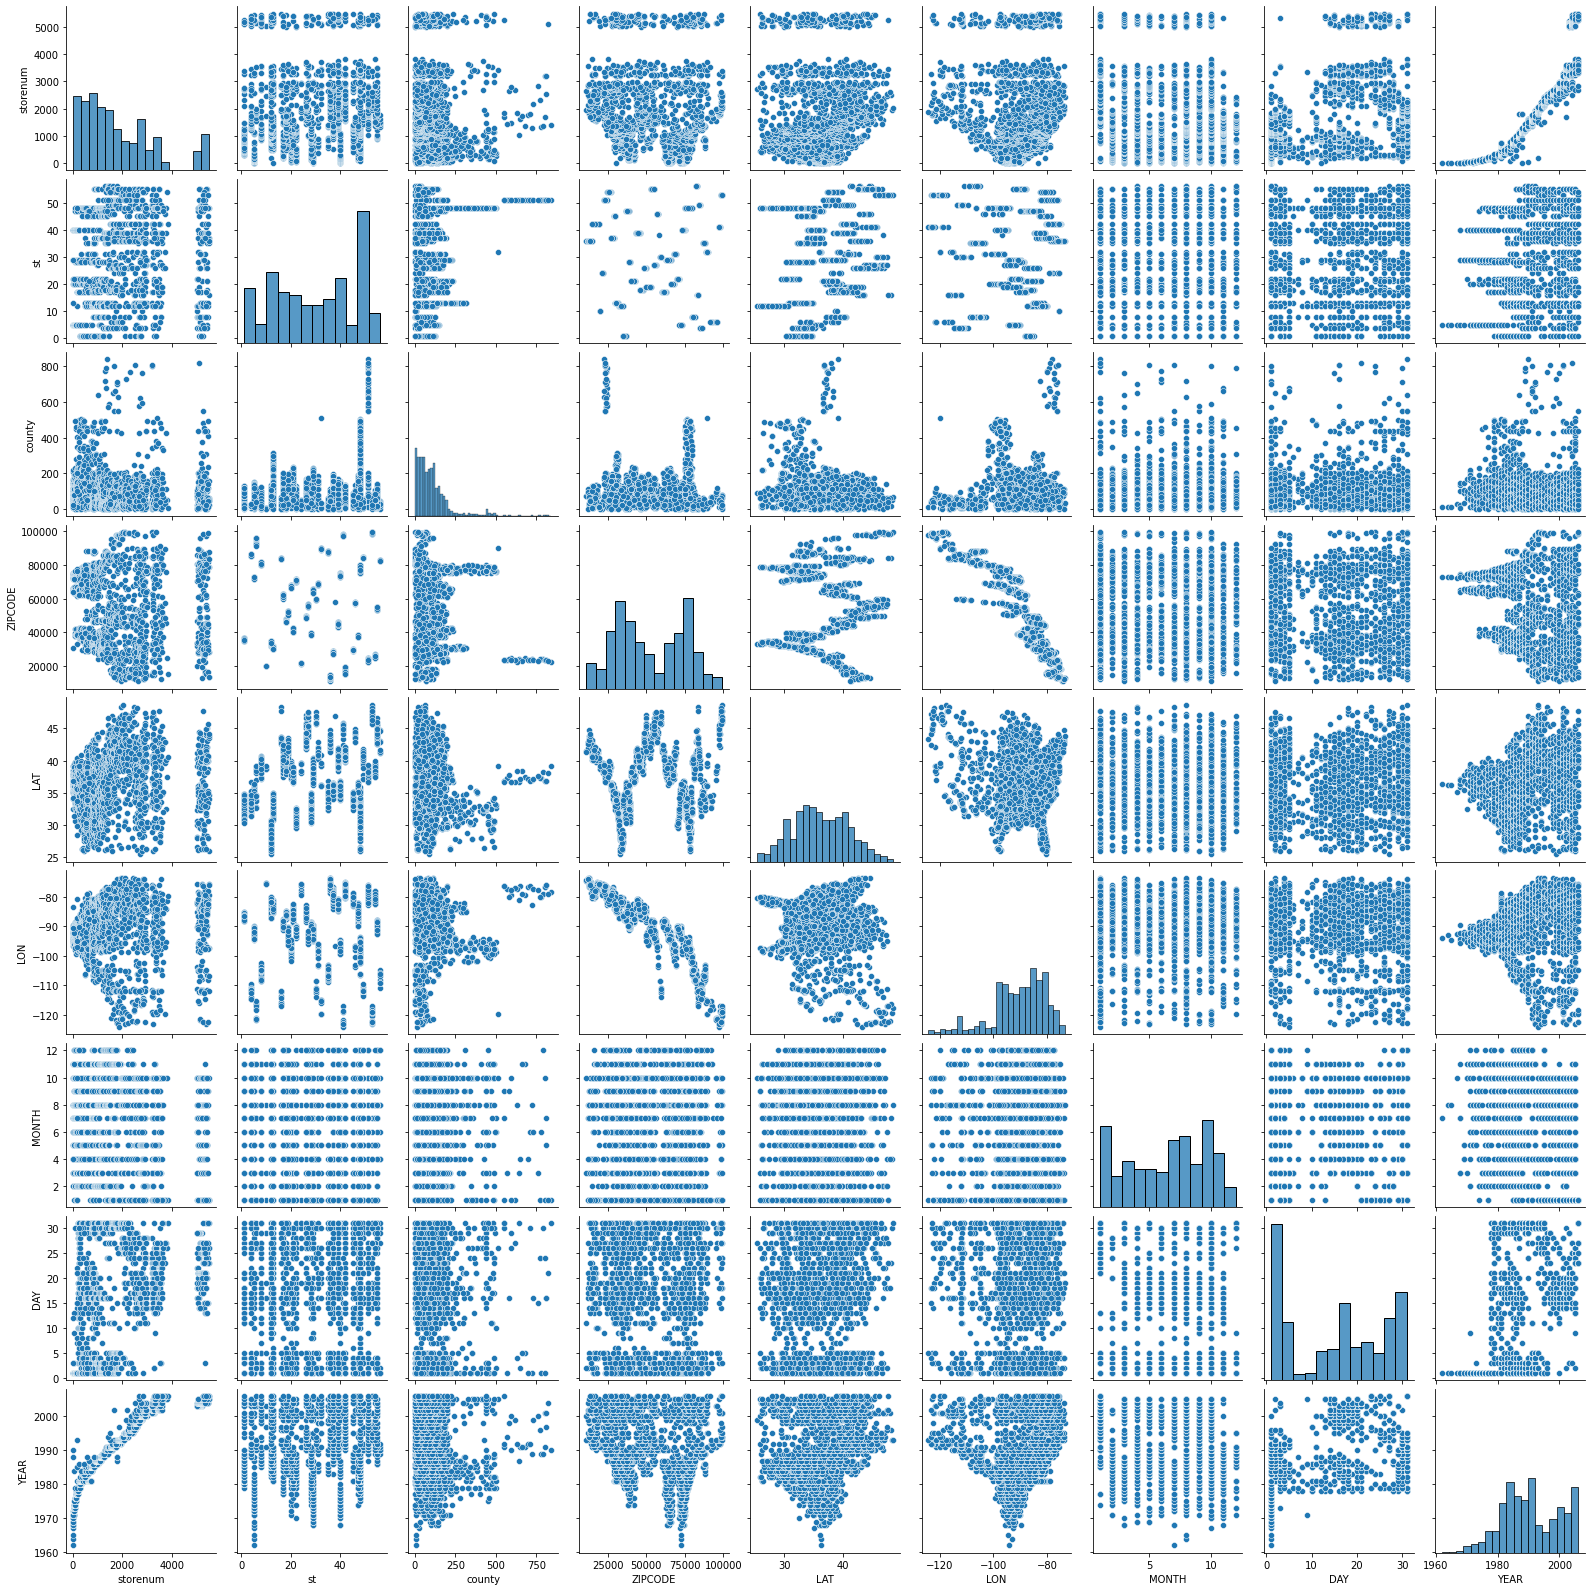

In [ ]:
import seaborn as sns
sns.pairplot(df_num_nonans_nb)

3. Dimensionality reduction (PCA):

varianza explicada acumulada =[ 27.03096121  48.20421575  62.45509874  74.32428278  84.45772313
  91.77295948  98.26816178  99.290566   100.        ]
Dimensionalidad datos en espacio PCA reducido = (1946, 7)


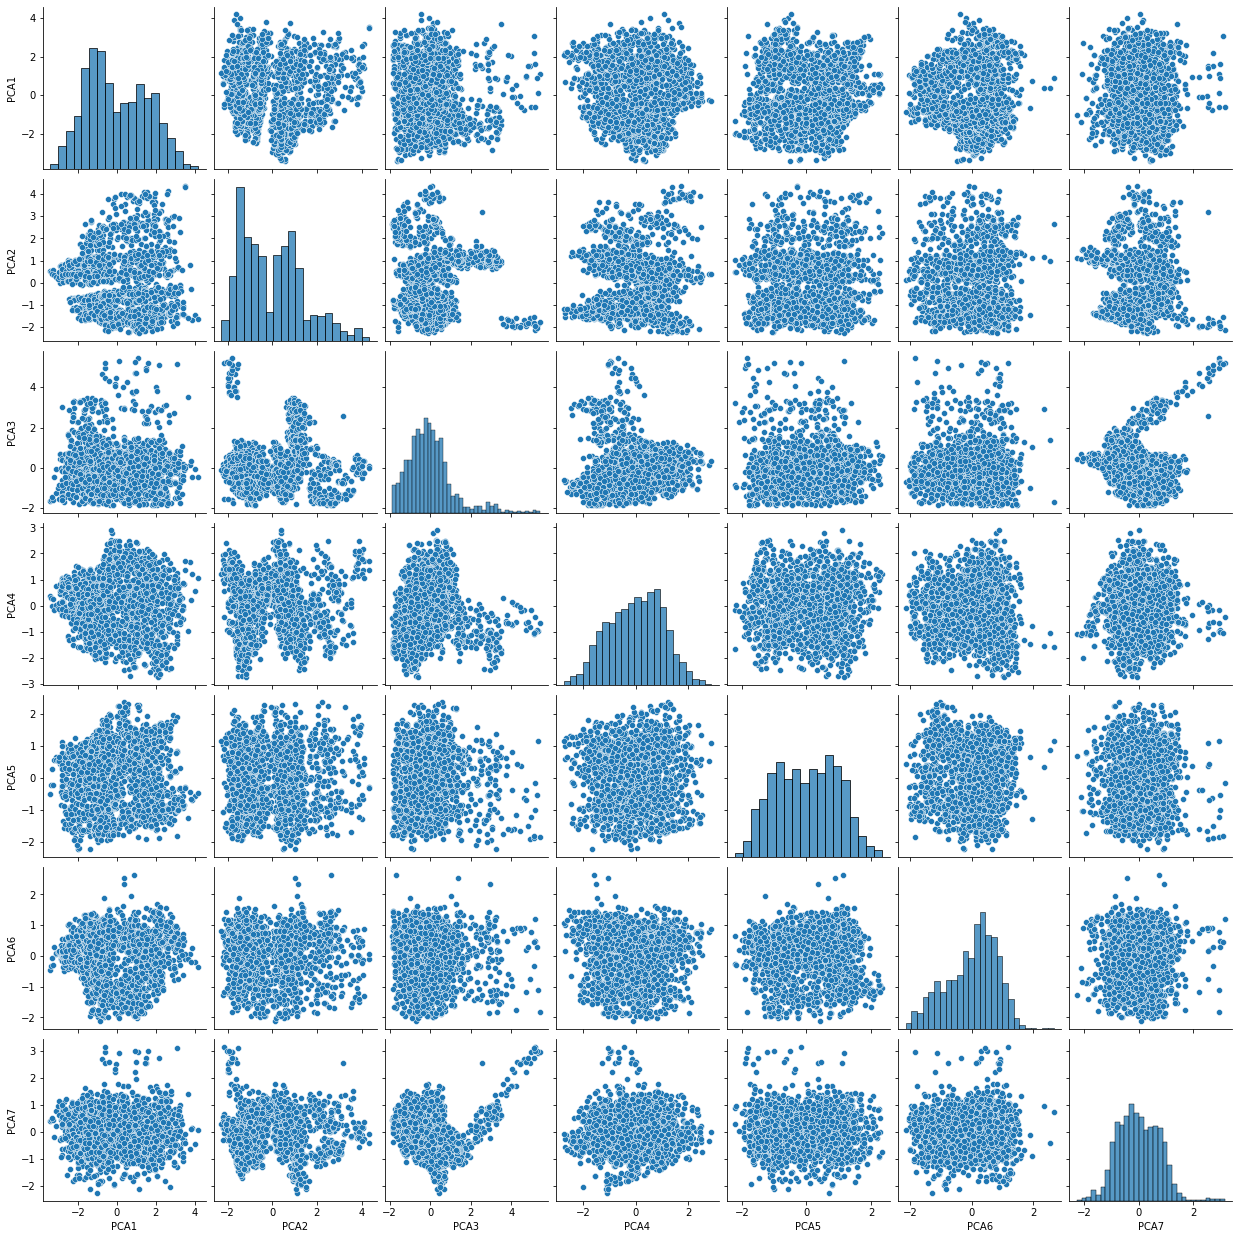

In [ ]:
import matplotlib.pylab as plt

X = df_num_nonans_nb
y = df['type_store'] # use origin as class label (not needed in PCA)

# scale data:
from sklearn.preprocessing import StandardScaler
XS = StandardScaler().fit_transform(X)

# PCA decomopositon:
from sklearn import decomposition
n_variables = df_num_nonans_nb.shape[1]
pca = decomposition.PCA(n_components=n_variables).fit(XS)

# varianza explicada acumulada:
print('varianza explicada acumulada ={}'.format(100*pca.explained_variance_ratio_.cumsum()))

# project data into PCA space:
Xproj = pca.transform(XS)

# Reducir dimensionalidad de los datos quedandonos solamente con tres componentes PCA:
ndim_reducida = 7 # establecer dimensionalidad reducida a partir de la varianza explicada por cada componente
XPCA = Xproj[:,0:ndim_reducida]

print('Dimensionalidad datos en espacio PCA reducido = {}'.format(XPCA.shape))

d = pd.DataFrame(XPCA,columns=['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7'])
sns.pairplot(d)
plt.show()

5. Clustering

5.1. k-means

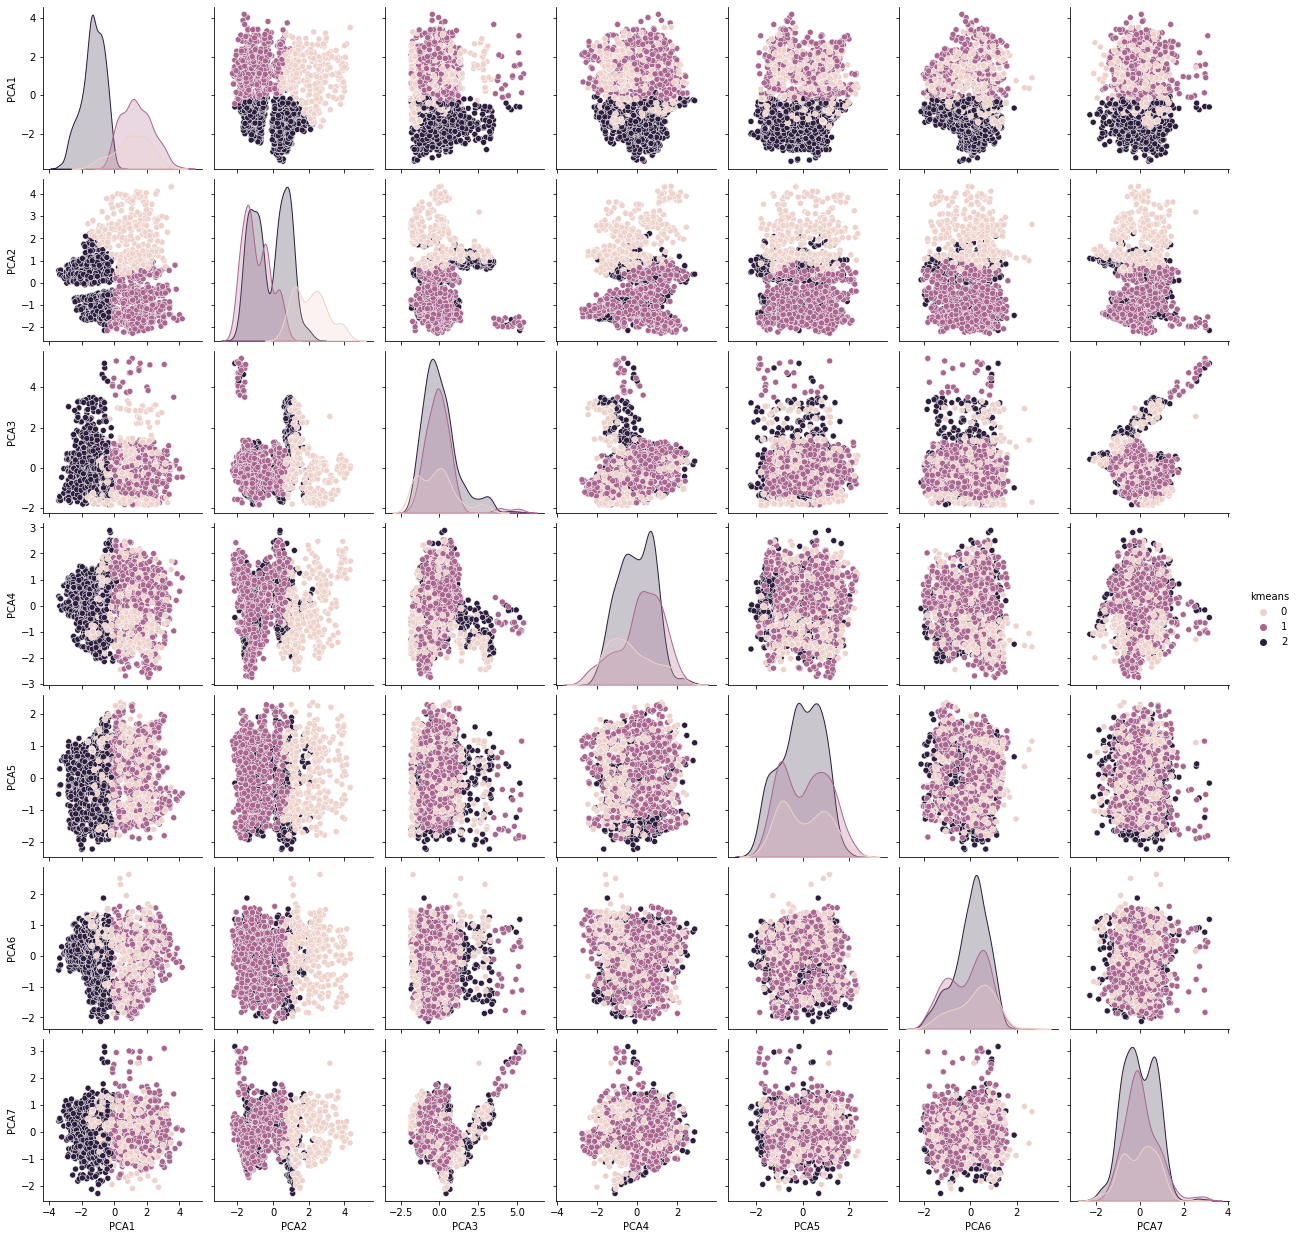

In [ ]:
from sklearn.cluster import KMeans
group = KMeans(n_clusters=3).fit_predict(d)

d1 = d
df_grouped = d1
df_grouped['kmeans'] = group
g = sns.pairplot(df_grouped, hue="kmeans")